## POLSCI 3 Ordinary Least Squares (OLS) Regression

In this notebook we will learn to code bivariate and multivariate regression and interpret the results.

## OLS (bivariate) regression

Ordinary Least Squares (OLS) regression is a method for assessing a linear relationship between an independent variable $X$ and a dependent (outcome) variable $Y$. Our equation for the regression model looks like this:
$${Y_i = \hat\alpha + \hat\beta X_i + \hat{u}_i}$$

Here ($X_i$,$Y_i$) represent a sample data point. (There are n values of $i$, where n is the sample size.) $\hat\alpha$ and $\hat\beta$ represent the Y-intercept and the slope of the regression line, respectively. $\hat{u}_i$ represents a sample residual (or error). We can see this visually by using a modified version of a function we used to understand correlations in model 7. The code below reproduces the figure we saw in the last module but also includes the regression line and a graphical representation of the residual for each point in the dataset. Note that the residual (error), the vertical distance between our data points and the regression line, is bigger for some data points that for others. 

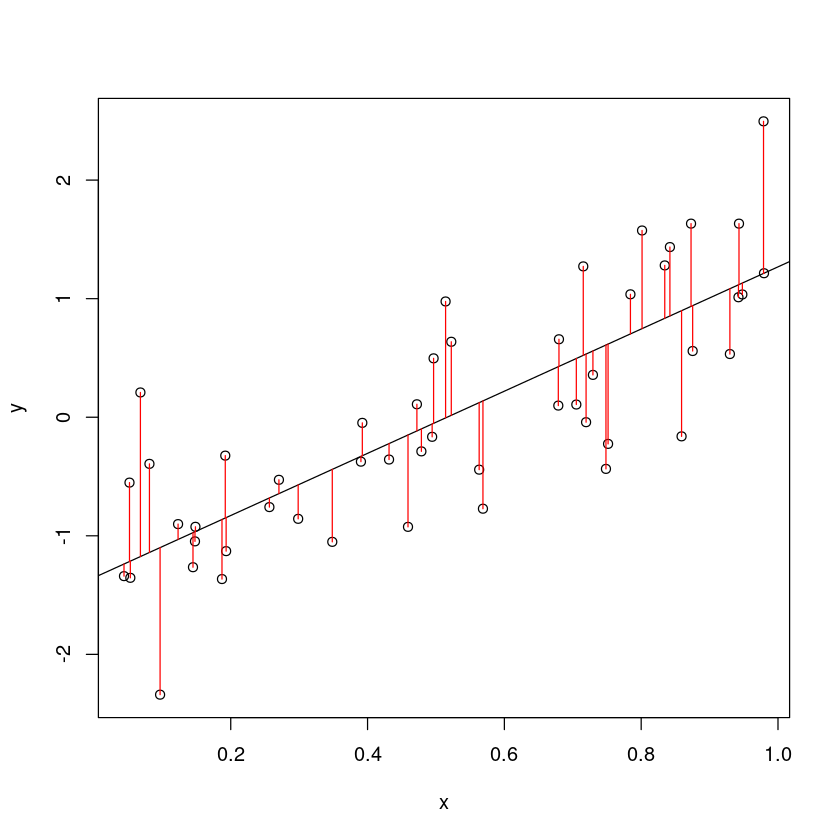

In [1]:
x=runif(n=50, min=0, max=1)
simcor = function (x, correlation) { 
    n = length(x)
    ymean = 0
    ysd = 1
    y = rnorm(n) 
    z = correlation * scale(x)[,1] + sqrt(1 - correlation^2) * scale(resid(lm(y ~ x)))[,1] 
    yresult = ymean + ysd * z 
    yresult }
y=simcor(x,.8)                                 # Try changing the 0.5 to something else between -1 and 1 
                                               # and reexecuting cell
plot(x,y)
abline(lm(y~x))
pre <- predict(lm(y~x))


segments(x, y, x, pre, col="red")               # plot distances between points and the regression line

Try editing the value of the correlation by replacing ".5" in the code above with a higher correlation and reexecuting the cell. What happens to the residuals?

What values of $\hat\alpha$ and $\hat\beta$ represent the "best fit" line?  OLS regression defines it as that line
that minimizes the sum of the squared residuals for each data point. Here are the corresponding values of $\hat\alpha$ (the Y-intercept) and $\hat\beta$ (the slope):

$$\hat\beta  =  \frac{\sum_{i=1}^{n} (X_i - \bar{X_i})(Y_i - \bar{Y_i})}{\sum_{i=1}^{n} (X_i - \bar{X_i})^2}  $$

$$\hat\alpha = \bar{Y} - \hat\beta\bar{X}$$

With a large dataset it would be a huge hassle to compute these sums by hand. Fortunately R can easily do the calculations for us. We need to use the <code>lm(y~x)</code> function. (Note the tilde between $y$ and $x$.) The y represents an array of values for our dependent variable and x represents an array of values for the independent variable. Let's try running a bivariate (two-variable) regression for the simulated example above.       

In [2]:
lm(y~x)                      # This command computes the sample regression coefficients


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
     -1.353        2.622  


Now let's try running a bivariate regression on a real data set, using our happiness data. 

In [3]:
happiness_data = read.csv('happiness_polity_2018.csv')
head(happiness_data)

,countryname,polity2,polity2_cat,gdpcapita,gdpcapita_cat,happiness,happiness_cat,life_expectancy,life_expectancy_cat
,<chr>,<int>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>
1,Afghanistan,-1,anocracies,2190.751,low-income,2.694,least happy,52.6,shortest lives
2,Albania,9,democracies,13602.374,middle-income,5.004,middle happiness,68.7,middle
3,Algeria,2,anocracies,11475.844,middle-income,5.043,middle happiness,65.9,middle
4,Argentina,9,democracies,22742.701,middle-income,5.793,middle happiness,68.8,middle
5,Armenia,7,democracies,12720.883,middle-income,5.062,middle happiness,66.9,middle
6,Australia,10,democracies,49563.000,rich,7.177,most happy,73.6,longest lives


Here is a refresher on the codebook for the happiness data:

<code>polity2</code>: The "Polity Score" of the country, which measures its political system on a 21-pont scale 
ranging from -10 (hereditary monarchy) to +10 (consolidated democracy).

<code>polity2_cat</code>: The political category the country is identified within. "autocracies" are on one end of 
the spectrum, "anocracies" are in the middle (semi-democracies), and "democracies" are at the top of the spectrum.

<code>gdpcapita</code>: GDP per Capita (economic output per person)

<code>gdpcapita_cat</code>: GDP/income category that the country falls into (based on GDP per capita)

<code>happiness</code>: The country's happiness index, measured through surveys that require participants to rank 
their level of happiness based on an assortment of quality-of-life factors

<code>happiness_cat</code>: Happiness category that the country falls into (based on happpiness indicator)

<code>life_expectancy</code>: Average life expectancy in years

<code>life_expectancy_cat</code>: Life Expectancy category that the country falls into

Suppose we hypothesize that happiness leads to a longer life. Happiness then becomes the independent variable
and life expectancy becomes the dependent variable. Running the regression takes one line of code:

In [4]:
lm(happiness_data$life_expectancy ~ happiness_data$happiness)


Call:
lm(formula = happiness_data$life_expectancy ~ happiness_data$happiness)

Coefficients:
             (Intercept)  happiness_data$happiness  
                  38.198                     4.762  


Recall from the lecture introducing regression that the formula for the regression line is given by: $$\hat{Y} = \hat\alpha + \hat\beta X$$ or, in
terms of our example: $$\hat{Y} = 38.198 + 4.762X$$ 

Note that the equation for the *line* does not include the random error term $\hat{u}$, and that we denote the predicted value of $Y$ as $\hat{Y}$ to distinguish the data points $Y$ from their corresponding values on the regression line.

Let's play with this equation a little. A country with a happiness value of zero ($X=0$) would have a predicted life expectancy of only 38.198 years!  For each unit increase in happiness the predicted life expectancy increases by 4.762 years. 

Note that this is all conditional on the veracity of the model we estimated. We could just as well have estimated the effect of increased life expectancy on overall happiness. Regression cannot tell us which is the "right" model to estimate!

Up to this point we have explored only the sample regression model. But recall that we are usually not interested
in the sample estimates in and of themselves. Rather, we want to use the sample estimates $\hat\alpha$ and 
$\hat\beta$ to make inferences about the corresponding population parameters $\alpha$ and $\beta$. Suppose our happiness data from 2018 is actually a random sample of larger population of country-years. What can the sample 
values tell us about the unknown population parameters? For that we need to know the standard errors and t-values of $\hat\alpha$ and $\hat\beta$. To display those we embed our regression function in the `summary` function:

In [5]:
summary(lm(happiness_data$life_expectancy ~ happiness_data$happiness))


Call:
lm(formula = happiness_data$life_expectancy ~ happiness_data$happiness)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.7829  -2.0997   0.1834   3.0816   9.2125 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               38.1984     2.0503   18.63   <2e-16 ***
happiness_data$happiness   4.7617     0.3649   13.05   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.512 on 129 degrees of freedom
Multiple R-squared:  0.569,	Adjusted R-squared:  0.5656 
F-statistic: 170.3 on 1 and 129 DF,  p-value: < 2.2e-16


## Multiple Regression

Our bivariate regression results are not the end of the story of the effect of happiness on life expectancy. The reason is the likelihood of omitted variable bias. Our sample estimated effect is an unbiased estimate of the population effect only in the unlikely scenario that we have included *all* explanatory variables that affect life expectancy and are corrrelated with happiness. But we know that life expectancy is probably more than just a function of happiness. Wealth probably matters too, and it is correlated with happiness. To generate less biased estimates of the effects of both wealth and happiness on life expectancy we need to include both wealth and happiness in a regression together. That is called multiple regression and the command to do it is a straightforward generalization of the command for bivariate regression. Note in the command below that the variable representing wealth is happiness$gdpcapita, and that it is added to the list of explanatory variables with a `+` sign. 

In [6]:
summary(lm(happiness_data$life_expectancy ~ happiness_data$happiness + happiness_data$gdpcapita))


Call:
lm(formula = happiness_data$life_expectancy ~ happiness_data$happiness + 
    happiness_data$gdpcapita)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.1814  -2.0457   0.6393   2.8786   7.1927 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              4.581e+01  2.435e+00  18.812  < 2e-16 ***
happiness_data$happiness 2.891e+00  5.060e-01   5.713 7.39e-08 ***
happiness_data$gdpcapita 1.278e-04  2.586e-05   4.942 2.37e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.151 on 128 degrees of freedom
Multiple R-squared:  0.638,	Adjusted R-squared:  0.6324 
F-statistic: 112.8 on 2 and 128 DF,  p-value: < 2.2e-16


#### Review

In this module we learned three commands:

`lm(y ~ x)` to estimate a linear model with one explanatory variable
`summary(lm(y ~ x))` to display standard errors, t-values, and p-values for inference
`summary(lm(y ~ x1 + x2))` to estimate a linear model with two explanatory variables

#### Reminder about Peer Consulting Office Hours

If you had trouble with any content in this notebook, Data Peer Consultants are here to help! You 
can view their locations and availabilites at this link: https://data.berkeley.edu/degrees/peer-advising.
Peer Consultants are there to answer all data-related questions, whether it be about the content of this notebook,
applications of data science in the world or other data science courses offered at Berkeley -- 
make sure to take advantage of this wonderful resource!